In [485]:
import numpy as np
import matplotlib.pyplot as plt

In [486]:
%matplotlib notebook

In [487]:
def dataset_generator(init, end, sample, mean, var, function):
    """
    Return X,Y,t being:
    x input
    y deterministic output
    t data with noise
    """
    sample = int(sample)
    x = (np.array([np.linspace(init,end,sample)])).T
    y = (function(x))
    e = (np.array([np.random.normal(mean,var,sample)])).T
    t = y + e

    return x,y,t,e

In [488]:
def design_matrix(x,function,m):
    """
    Return the Phi matrix
    """  
    phi = np.zeros((len(x),m))
    mu = np.array([np.linspace(min(x),max(x),m)]).T
    for i in range(len(x)):
        for j in range(m):
            phi[i][j] = function(x[i],mu[j])    
    return phi

In [489]:
def fit(phi,t):
    """
    Return the model trained, i.e., W vector
    """
    w = np.linalg.pinv(phi)@t
    return w

In [490]:
def fit_l(phi,t,lda):
    """
    Return the model trained, i.e., W vector
    """
    I = np.identity(len(phi))
    
    w = np.linalg.inv(lda*I+phi.T@phi)@phi.T@t
    return w

In [491]:
def predict(phi,w):
    return phi@w

In [492]:
def split_data(x,t):
    from math import floor
    n = floor(len(x)/3)
    x_train , x_valid , x_test = x[0:n], x[n:2*n] , x[2*n:-1]
    t_train , t_valid , t_test = t[0:n], t[n:2*n] , t[2*n:-1]
    
    return x_train , x_valid , x_test, t_train , t_valid , t_test
    

In [493]:
def f_deterministic(x):
    """
    Return the deterministic function.
    """
    return 2*np.sin(np.pi*x) + 0*x

In [494]:
def f_basis(x,mu,s=1):
    """
    Return gaussian function with var = 1.
    """
    return np.e**(-(x-mu)**2 / s**2)   

#### Initializing

In [495]:
x,y,t,e = dataset_generator(0,12,100,0,0.8*2,f_deterministic)

<IPython.core.display.Javascript object>


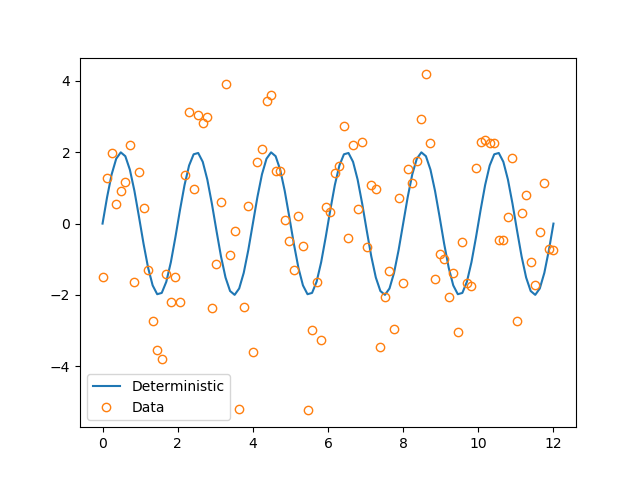

In [496]:
plt.figure();
plt.plot(x,y,label='Deterministic');
plt.plot(x,t,'o',label='Data',markerfacecolor="None");
plt.legend();

m = 500;
phi = np.zeros((len(x),m))
mu = np.array([np.linspace(min(x),max(x),m)]).T
for i in range(len(x)):
    for j in range(m):
        phi[i][j] = f_basis(x[i],mu[j])
w = np.linalg.pinv(phi)@t
y_pred = phi@w

print(x.shape,t.shape,y_pred.shape)

In [497]:
phi = design_matrix(x,f_basis,len(x))
w = fit(phi,t)
y_pred = predict(phi,w)

<IPython.core.display.Javascript object>


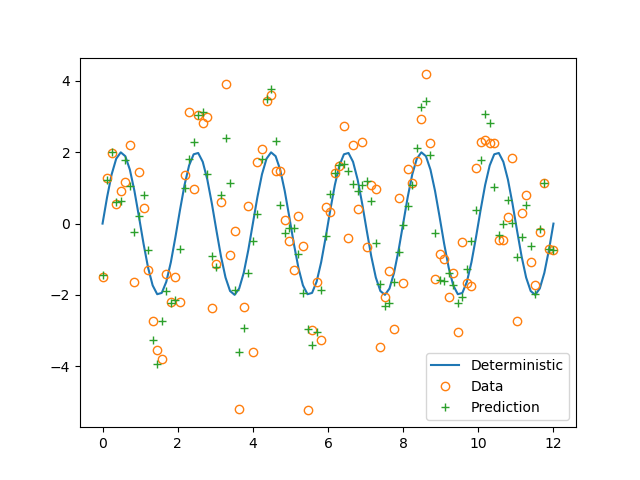

In [498]:
plt.figure();
plt.plot(x,y,label='Deterministic');
plt.plot(x,t,'o',label='Data',markerfacecolor="None");
plt.plot(x,y_pred,'+',label='Prediction',markerfacecolor="None");
plt.legend();

In [499]:
x_train, x_valid, x_test, t_train, t_valid, t_test = split_data(x, t)

In [500]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(33, 1)
(33, 1)
(33, 1)


<IPython.core.display.Javascript object>


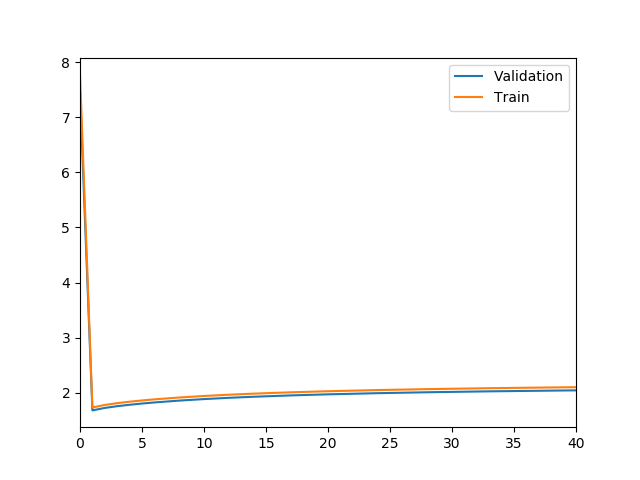

In [502]:
Error_train = [];
Error_valid = [];

#Concat Train and Validation X
x0 = np.append(x_train,x_valid)
x0 = np.reshape(x0,(len(x0),1))

#Concat Train and Validation T
t0 = np.append(t_train,t_valid)
t0 = np.reshape(t0,(len(t0),1))

for i in range(200):
    
    #Calculate train
    phi = design_matrix(x_train,f_basis,len(x_train))
    w = fit_l(phi,t_train,i)
    y_train = predict(phi,w)
    
    #Calculate validation
    phi_v = design_matrix(x_valid,f_basis,len(x_train))
    y_valid = predict(phi_v,w) 
    
    E_train = (sum((y_train - t_train) ** 2) / len(y_train)) ** 0.5
    E_valid = (sum((y_valid - t_valid) ** 2) / len(y_valid)) ** 0.5
    Error_train = np.append(Error_train,E_train)
    Error_valid = np.append(Error_valid,E_valid)
    
    #plt.figure()
    #plt.plot(x0,y_valid);
minimum = int(np.argmin(Error_train))

plt.figure()
plt.plot(np.arange(200),Error_valid,label="Validation");
plt.plot(np.arange(200),Error_train,label="Train");
#plt.yscale('log');
plt.xlim((0,40));
plt.legend();

<IPython.core.display.Javascript object>


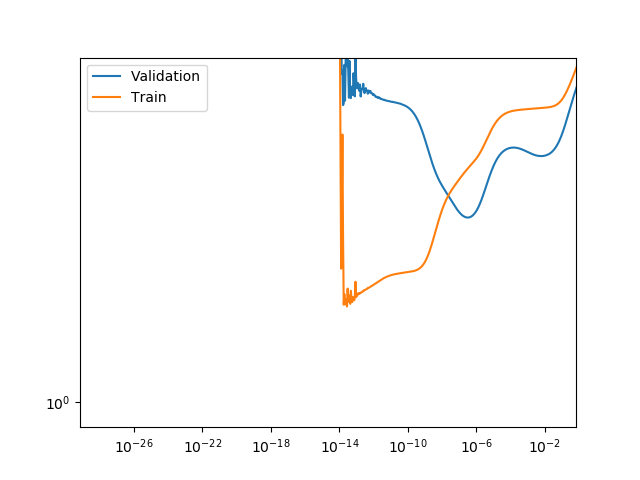

In [518]:
interval = np.logspace(-26,12,1e3)
Error_train = [];
Error_valid = [];

#Concat Train and Validation X
x0 = np.append(x_train,x_valid)
x0 = np.reshape(x0,(len(x0),1))

#Concat Train and Validation T
t0 = np.append(t_train,t_valid)
t0 = np.reshape(t0,(len(t0),1))

for i in range(1000):
    
    #Calculate train
    phi = design_matrix(x_train,f_basis,len(x_train))
    w = fit_l(phi,t_train,interval[i])
    y_train = predict(phi,w)
    
    #Calculate validation
    phi_v = design_matrix(x_valid,f_basis,len(x_train))
    y_valid = predict(phi_v,w) 
    
    E_train = (sum((y_train - t_train) ** 2) / len(y_train)) ** 0.5
    E_valid = (sum((y_valid - t_valid) ** 2) / len(y_valid)) ** 0.5
    Error_train = np.append(Error_train,E_train)
    Error_valid = np.append(Error_valid,E_valid)
    
    #plt.figure()
    #plt.plot(x0,y_valid);

plt.figure()
plt.plot(interval,Error_valid,label="Validation");
plt.plot(interval,Error_train,label="Train");
plt.yscale('log');
plt.xscale('log');
#plt.xlim((0,40));
plt.legend();

In [529]:
w = fit_l(phi,t_train,interval[np.argmin(Error_valid)])
np.linalg.norm(w)

2772.0708711909874

In [419]:
#Error_train = [];
Error_test = [];

i = int(np.argmin(Error_valid))

x1 = np.append(x0,x_test)
x1 = np.reshape(x1,(len(x1),1))
t1 = np.append(t0,t_test)
t1 = np.reshape(t1,(len(t1),1))

phi = design_matrix(x0,f_basis,i)
w = fit(phi,t0)
#y_train = predict(phi,w)
    
#Calculate validation
phi_te = design_matrix(x1,f_basis,i)
y_test = predict(phi_te,w)

    
#E_test = (sum((y_test - t1) ** 2) / len(y_test)) ** 0.5
#Error_test = np.append(Error_test,E_test)
    
    #plt.figure()
    #plt.plot(x0,y_valid);

<IPython.core.display.Javascript object>


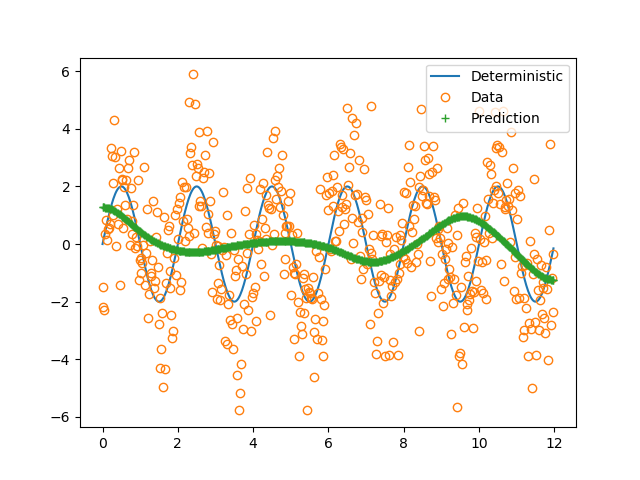

In [420]:
plt.figure();
plt.plot(x1,y[:-1],label='Deterministic');
plt.plot(x1,t[:-1],'o',label='Data',markerfacecolor="None");
plt.plot(x1,y_test,'+',label='Prediction',markerfacecolor="None");
plt.legend();